<!-- dom:TITLE: Week 40: From Stochastic Gradient Descent to Neural networks -->
# Week 40: From Stochastic Gradient Descent to Neural networks
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo, Norway & Department of Physics and Astronomy and Facility for Rare Ion Beams, Michigan State University, USA -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo, Norway and Department of Physics and Astronomy and Facility for Rare Ion Beams, Michigan State University, USA

Date: **Oct 9, 2021**

Copyright 1999-2021, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license




## Plan for week 40

* Thursday: Stochastic Gradient descent with examples and automatic differentiation and begin Neural Networks. 

  * [Video of Lecture](https://www.uio.no/studier/emner/matnat/fys/FYS-STK3155/h21/forelesningsvideoer/LectureOctober7.mp4?vrtx=view-as-webpage)


* Friday: Neural Networks, setting up the basic steps, from the simple perceptron model to the multi-layer perceptron model. 

  * [Video of Lecture](https://www.uio.no/studier/emner/matnat/fys/FYS-STK3155/h21/forelesningsvideoer/LectureOctober8.mp4?vrtx=view-as-webpage)


Reading suggestions for both days: [Aurelien Geron's chapter 10](https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/TensorflowML.pdf) and Hastie et al chapter 11.
For Stochastic Gradient Descent, we recommend chapter 4 of Geron's text.
For neural networks we recommend Goodfellow et al chapters 6 and 7 and Bishop 5.1-5.4



## Overview video on Stochastic Gradient Descent

[What is Stochastic Gradient Descent](https://www.youtube.com/watch?v=vMh0zPT0tLI&ab_channel=StatQuestwithJoshStarmer)


## Batches and mini-batches

In gradient descent we compute the cost function and its gradient for all data points we have.

In large-scale applications such as the [ILSVRC challenge](https://www.image-net.org/challenges/LSVRC/), the
training data can have on order of millions of examples. Hence, it
seems wasteful to compute the full cost function over the entire
training set in order to perform only a single parameter update. A
very common approach to addressing this challenge is to compute the
gradient over batches of the training data. For example, in current
a typical batch could contain some thousand  examples from
an  entire training set of several millions. This batch is then used to
perform a parameter update.

## Stochastic Gradient Descent (SGD)

In stochastic gradient descent, the extreme case is the case where we
have only one batch, that is we include the whole data set.

This process is called Stochastic Gradient
Descent (SGD) (or also sometimes on-line gradient descent). This is
relatively less common to see because in practice due to vectorized
code optimizations it can be computationally much more efficient to
evaluate the gradient for 100 examples, than the gradient for one
example 100 times. Even though SGD technically refers to using a
single example at a time to evaluate the gradient, you will hear
people use the term SGD even when referring to mini-batch gradient
descent (i.e. mentions of MGD for “Minibatch Gradient Descent”, or BGD
for “Batch gradient descent” are rare to see), where it is usually
assumed that mini-batches are used. The size of the mini-batch is a
hyperparameter but it is not very common to cross-validate or bootstrap it. It is
usually based on memory constraints (if any), or set to some value,
e.g. 32, 64 or 128. We use powers of 2 in practice because many
vectorized operation implementations work faster when their inputs are
sized in powers of 2.

In our notes with  SGD we mean stochastic gradient descent with mini-batches.


## Stochastic Gradient Descent

Stochastic gradient descent (SGD) and variants thereof address some of
the shortcomings of the Gradient descent method discussed above.

The underlying idea of SGD comes from the observation that the cost
function, which we want to minimize, can almost always be written as a
sum over $n$ data points $\{\mathbf{x}_i\}_{i=1}^n$,

$$
C(\mathbf{\beta}) = \sum_{i=1}^n c_i(\mathbf{x}_i,
\mathbf{\beta}).
$$

## Computation of gradients

This in turn means that the gradient can be
computed as a sum over $i$-gradients

$$
\nabla_\beta C(\mathbf{\beta}) = \sum_i^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}).
$$

Stochasticity/randomness is introduced by only taking the
gradient on a subset of the data called minibatches.  If there are $n$
data points and the size of each minibatch is $M$, there will be $n/M$
minibatches. We denote these minibatches by $B_k$ where
$k=1,\cdots,n/M$.

## SGD example

As an example, suppose we have $10$ data points $(\mathbf{x}_1,\cdots, \mathbf{x}_{10})$ 
and we choose to have $M=5$ minibathces,
then each minibatch contains two data points. In particular we have
$B_1 = (\mathbf{x}_1,\mathbf{x}_2), \cdots, B_5 =
(\mathbf{x}_9,\mathbf{x}_{10})$. Note that if you choose $M=1$ you
have only a single batch with all data points and on the other extreme,
you may choose $M=n$ resulting in a minibatch for each datapoint, i.e
$B_k = \mathbf{x}_k$.

The idea is now to approximate the gradient by replacing the sum over
all data points with a sum over the data points in one the minibatches
picked at random in each gradient descent step

$$
\nabla_{\beta}
C(\mathbf{\beta}) = \sum_{i=1}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}) \rightarrow \sum_{i \in B_k}^n \nabla_\beta
c_i(\mathbf{x}_i, \mathbf{\beta}).
$$

## The gradient step

Thus a gradient descent step now looks like

$$
\beta_{j+1} = \beta_j - \gamma_j \sum_{i \in B_k}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta})
$$

where $k$ is picked at random with equal
probability from $[1,n/M]$. An iteration over the number of
minibathces (n/M) is commonly referred to as an epoch. Thus it is
typical to choose a number of epochs and for each epoch iterate over
the number of minibatches, as exemplified in the code below.

## Simple example code

In [ ]:
import numpy as np 

n = 100 #100 datapoints 
M = 5   #size of each mini-batche
m = int(n/M) #number of minibatches
n_epochs = 10 #number of epochs

j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for 
        j += 1

Taking the gradient only on a subset of the data has two important
benefits. First, it introduces randomness which decreases the chance
that our opmization scheme gets stuck in a local minima. Second, if
the size of the minibatches are small relative to the number of
datapoints ($M <  n$), the computation of the gradient is much
cheaper since we sum over the datapoints in the $k-th$ minibatch and not
all $n$ datapoints.

## When do we stop?

A natural question is when do we stop the search for a new minimum?
One possibility is to compute the full gradient after a given number
of epochs and check if the norm of the gradient is smaller than some
threshold and stop if true. However, the condition that the gradient
is zero is valid also for local minima, so this would only tell us
that we are close to a local/global minimum. However, we could also
evaluate the cost function at this point, store the result and
continue the search. If the test kicks in at a later stage we can
compare the values of the cost function and keep the $\beta$ that
gave the lowest value.

## Slightly different approach

Another approach is to let the step length $\gamma_j$ depend on the
number of epochs in such a way that it becomes very small after a
reasonable time such that we do not move at all.

As an example, let $e = 0,1,2,3,\cdots$ denote the current epoch and let $t_0, t_1 > 0$ be two fixed numbers. Furthermore, let $t = e \cdot m + i$ where $m$ is the number of minibatches and $i=0,\cdots,m-1$. Then the function $$\gamma_j(t; t_0, t_1) = \frac{t_0}{t+t_1} $$ goes to zero as the number of epochs gets large. I.e. we start with a step length $\gamma_j (0; t_0, t_1) = t_0/t_1$ which decays in *time* $t$.

In this way we can fix the number of epochs, compute $\beta$ and
evaluate the cost function at the end. Repeating the computation will
give a different result since the scheme is random by design. Then we
pick the final $\beta$ that gives the lowest value of the cost
function.

In [ ]:
import numpy as np 

def step_length(t,t0,t1):
    return t0/(t+t1)

n = 100 #100 datapoints 
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
n_epochs = 500 #number of epochs
t0 = 1.0
t1 = 10

gamma_j = t0/t1
j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for beta
        t = epoch*m+i
        gamma_j = step_length(t,t0,t1)
        j += 1

print("gamma_j after %d epochs: %g" % (n_epochs,gamma_j))

We note that we have defined several hyperparameters. These are now the number of epochs, the number of mini-batches and the parameters $t_0$ and $t_1$.


## Program for stochastic gradient

Own inversion
[[3.95844072]
 [3.07408844]]
sgdreg from scikit
[[4.03300064]
 [3.14476033]]
theta from own gd
[[3.95844072]
 [3.07408844]]
theta from own sdg
[[3.75264114]
 [3.20029741]]


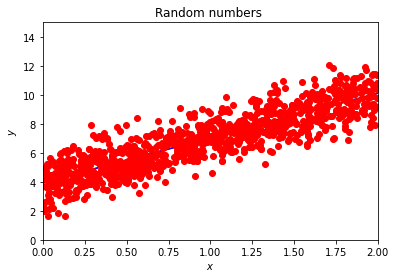

In [25]:
%matplotlib inline

# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

n = 1000
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
sgdreg = SGDRegressor(max_iter = 50, penalty=None, eta0=0.1)
sgdreg.fit(x,y.ravel())
print("sgdreg from scikit")
print(np.append(sgdreg.intercept_, sgdreg.coef_).reshape([X.shape[1],1]))


theta = np.random.randn(2,1)
eta = 0.1
Niterations = 1000


for iter in range(Niterations):
    gradients = 2.0/n * X.T @ ((X @ theta)-y)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)


n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2.0 * xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

## Momentum based GD

The stochastic gradient descent (SGD) is almost always used with a
*momentum* or inertia term that serves as a memory of the direction we
are moving in parameter space.  This is typically implemented as
follows

$$
\mathbf{v}_{t}=\gamma \mathbf{v}_{t-1}+\eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation} 
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_t -\mathbf{v}_{t},
\label{_auto1} \tag{1}
\end{equation}
$$

where we have introduced a momentum parameter $\gamma$, with
$0\le\gamma\le 1$, and for brevity we dropped the explicit notation to
indicate the gradient is to be taken over a different mini-batch at
each step. We call this algorithm gradient descent with momentum
(GDM). From these equations, it is clear that $\mathbf{v}_t$ is a
running average of recently encountered gradients and
$(1-\gamma)^{-1}$ sets the characteristic time scale for the memory
used in the averaging procedure. Consistent with this, when
$\gamma=0$, this just reduces down to ordinary SGD as discussed
earlier. An equivalent way of writing the updates is

$$
\Delta \boldsymbol{\theta}_{t+1} = \gamma \Delta \boldsymbol{\theta}_t -\ \eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t),
$$

where we have defined $\Delta \boldsymbol{\theta}_{t}= \boldsymbol{\theta}_t-\boldsymbol{\theta}_{t-1}$.

## More on momentum based approaches

Let us try to get more intuition from these equations. It is helpful
to consider a simple physical analogy with a particle of mass $m$
moving in a viscous medium with drag coefficient $\mu$ and potential
$E(\mathbf{w})$. If we denote the particle's position by $\mathbf{w}$,
then its motion is described by

$$
m {d^2 \mathbf{w} \over dt^2} + \mu {d \mathbf{w} \over dt }= -\nabla_w E(\mathbf{w}).
$$

We can discretize this equation in the usual way to get

$$
m { \mathbf{w}_{t+\Delta t}-2 \mathbf{w}_{t} +\mathbf{w}_{t-\Delta t} \over (\Delta t)^2}+\mu {\mathbf{w}_{t+\Delta t}- \mathbf{w}_{t} \over \Delta t} = -\nabla_w E(\mathbf{w}).
$$

Rearranging this equation, we can rewrite this as

$$
\Delta \mathbf{w}_{t +\Delta t}= - { (\Delta t)^2 \over m +\mu \Delta t} \nabla_w E(\mathbf{w})+ {m \over m +\mu \Delta t} \Delta \mathbf{w}_t.
$$

## Momentum parameter

Notice that this equation is identical to previous one if we identify
the position of the particle, $\mathbf{w}$, with the parameters
$\boldsymbol{\theta}$. This allows us to identify the momentum
parameter and learning rate with the mass of the particle and the
viscous drag as:

$$
\gamma= {m \over m +\mu \Delta t }, \qquad \eta = {(\Delta t)^2 \over m +\mu \Delta t}.
$$

Thus, as the name suggests, the momentum parameter is proportional to
the mass of the particle and effectively provides inertia.
Furthermore, in the large viscosity/small learning rate limit, our
memory time scales as $(1-\gamma)^{-1} \approx m/(\mu \Delta t)$.

Why is momentum useful? SGD momentum helps the gradient descent
algorithm gain speed in directions with persistent but small gradients
even in the presence of stochasticity, while suppressing oscillations
in high-curvature directions. This becomes especially important in
situations where the landscape is shallow and flat in some directions
and narrow and steep in others. It has been argued that first-order
methods (with appropriate initial conditions) can perform comparable
to more expensive second order methods, especially in the context of
complex deep learning models.

These beneficial properties of momentum can sometimes become even more
pronounced by using a slight modification of the classical momentum
algorithm called Nesterov Accelerated Gradient (NAG).

In the NAG algorithm, rather than calculating the gradient at the
current parameters, $\nabla_\theta E(\boldsymbol{\theta}_t)$, one
calculates the gradient at the expected value of the parameters given
our current momentum, $\nabla_\theta E(\boldsymbol{\theta}_t +\gamma
\mathbf{v}_{t-1})$. This yields the NAG update rule

$$
\mathbf{v}_{t}=\gamma \mathbf{v}_{t-1}+\eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t +\gamma \mathbf{v}_{t-1}) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} 
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_t -\mathbf{v}_{t}.
\label{_auto2} \tag{2}
\end{equation}
$$

One of the major advantages of NAG is that it allows for the use of a larger learning rate than GDM for the same choice of $\gamma$.


## Second moment of the gradient


In stochastic gradient descent, with and without momentum, we still
have to specify a schedule for tuning the learning rates $\eta_t$
as a function of time.  As discussed in the context of Newton's
method, this presents a number of dilemmas. The learning rate is
limited by the steepest direction which can change depending on the
current position in the landscape. To circumvent this problem, ideally
our algorithm would keep track of curvature and take large steps in
shallow, flat directions and small steps in steep, narrow directions.
Second-order methods accomplish this by calculating or approximating
the Hessian and normalizing the learning rate by the
curvature. However, this is very computationally expensive for
extremely large models. Ideally, we would like to be able to
adaptively change the step size to match the landscape without paying
the steep computational price of calculating or approximating
Hessians.

Recently, a number of methods have been introduced that accomplish
this by tracking not only the gradient, but also the second moment of
the gradient. These methods include AdaGrad, AdaDelta, Root Mean Squared Propagation (RMS-Prop), and
ADAM.

## RMS prop

In RMS prop, in addition to keeping a running average of the first
moment of the gradient, we also keep track of the second moment
denoted by $\mathbf{s}_t=\mathbb{E}[\mathbf{g}_t^2]$. The update rule
for RMS prop is given by

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) 
\label{_auto3} \tag{3}
\end{equation}
$$

$$
\mathbf{s}_t =\beta \mathbf{s}_{t-1} +(1-\beta)\mathbf{g}_t^2 \nonumber
$$

$$
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t { \mathbf{g}_t \over \sqrt{\mathbf{s}_t +\epsilon}}, \nonumber
$$

where $\beta$ controls the averaging time of the second moment and is
typically taken to be about $\beta=0.9$, $\eta_t$ is a learning rate
typically chosen to be $10^{-3}$, and $\epsilon\sim 10^{-8} $ is a
small regularization constant to prevent divergences. Multiplication
and division by vectors is understood as an element-wise operation. It
is clear from this formula that the learning rate is reduced in
directions where the norm of the gradient is consistently large. This
greatly speeds up the convergence by allowing us to use a larger
learning rate for flat directions.


## ADAM optimizer

A related algorithm is the ADAM optimizer. In ADAM, we keep a running
average of both the first and second moment of the gradient and use
this information to adaptively change the learning rate for different
parameters. In addition to keeping a running average of the first and
second moments of the gradient
(i.e. $\mathbf{m}_t=\mathbb{E}[\mathbf{g}_t]$ and
$\mathbf{s}_t=\mathbb{E}[\mathbf{g}^2_t]$, respectively), ADAM
performs an additional bias correction to account for the fact that we
are estimating the first two moments of the gradient using a running
average (denoted by the hats in the update rule below). The update
rule for ADAM is given by (where multiplication and division are once
again understood to be element-wise operations below)

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) 
\label{_auto4} \tag{4}
\end{equation}
$$

$$
\mathbf{m}_t = \beta_1 \mathbf{m}_{t-1} + (1-\beta_1) \mathbf{g}_t \nonumber
$$

$$
\mathbf{s}_t =\beta_2 \mathbf{s}_{t-1} +(1-\beta_2)\mathbf{g}_t^2 \nonumber
$$

$$
\boldsymbol{\mathbf{m}}_t={\mathbf{m}_t \over 1-\beta_1^t} \nonumber
$$

$$
\boldsymbol{\mathbf{s}}_t ={\mathbf{s}_t \over1-\beta_2^t} \nonumber
$$

$$
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t { \boldsymbol{\mathbf{m}}_t \over \sqrt{\boldsymbol{\mathbf{s}}_t} +\epsilon}, \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation} 
\label{_auto5} \tag{5}
\end{equation}
$$

where $\beta_1$ and $\beta_2$ set the memory lifetime of the first and
second moment and are typically taken to be $0.9$ and $0.99$
respectively, and $\eta$ and $\epsilon$ are identical to RMSprop.

Like in RMSprop, the effective step size of a parameter depends on the
magnitude of its gradient squared.  To understand this better, let us
rewrite this expression in terms of the variance
$\boldsymbol{\sigma}_t^2 = \boldsymbol{\mathbf{s}}_t -
(\boldsymbol{\mathbf{m}}_t)^2$. Consider a single parameter $\theta_t$. The
update rule for this parameter is given by

$$
\Delta \theta_{t+1}= -\eta_t { \boldsymbol{m}_t \over \sqrt{\sigma_t^2 +  m_t^2 }+\epsilon}.
$$

## Practical tips

* **Randomize the data when making mini-batches**. It is always important to randomly shuffle the data when forming mini-batches. Otherwise, the gradient descent method can fit spurious correlations resulting from the order in which data is presented.

* **Transform your inputs**. Learning becomes difficult when our landscape has a mixture of steep and flat directions. One simple trick for minimizing these situations is to standardize the data by subtracting the mean and normalizing the variance of input variables. Whenever possible, also decorrelate the inputs. To understand why this is helpful, consider the case of linear regression. It is easy to show that for the squared error cost function, the Hessian of the cost function is just the correlation matrix between the inputs. Thus, by standardizing the inputs, we are ensuring that the landscape looks homogeneous in all directions in parameter space. Since most deep networks can be viewed as linear transformations followed by a non-linearity at each layer, we expect this intuition to hold beyond the linear case.

* **Monitor the out-of-sample performance.** Always monitor the performance of your model on a validation set (a small portion of the training data that is held out of the training process to serve as a proxy for the test set. If the validation error starts increasing, then the model is beginning to overfit. Terminate the learning process. This *early stopping* significantly improves performance in many settings.

* **Adaptive optimization methods don't always have good generalization.** Recent studies have shown that adaptive methods such as ADAM, RMSPorp, and AdaGrad tend to have poor generalization compared to SGD or SGD with momentum, particularly in the high-dimensional limit (i.e. the number of parameters exceeds the number of data points). Although it is not clear at this stage why these methods perform so well in training deep neural networks, simpler procedures like properly-tuned SGD may work as well or better in these applications.

Geron's text, see chapter 11, has several interesting discussions.



## Automatic differentiation

[Automatic differentiation (AD)](https://en.wikipedia.org/wiki/Automatic_differentiation), 
also called algorithmic
differentiation or computational differentiation,is a set of
techniques to numerically evaluate the derivative of a function
specified by a computer program. AD exploits the fact that every
computer program, no matter how complicated, executes a sequence of
elementary arithmetic operations (addition, subtraction,
multiplication, division, etc.) and elementary functions (exp, log,
sin, cos, etc.). By applying the chain rule repeatedly to these
operations, derivatives of arbitrary order can be computed
automatically, accurately to working precision, and using at most a
small constant factor more arithmetic operations than the original
program.

Automatic differentiation is neither:

* Symbolic differentiation, nor

* Numerical differentiation (the method of finite differences).

Symbolic differentiation can lead to inefficient code and faces the
difficulty of converting a computer program into a single expression,
while numerical differentiation can introduce round-off errors in the
discretization process and cancellation



Python has tools for so-called **automatic differentiation**.
Consider the following example

$$
f(x) = \sin\left(2\pi x + x^2\right)
$$

which has the following derivative (*analytically*)

$$
f'(x) = \cos\left(2\pi x + x^2\right)\left(2\pi + 2x\right)
$$

Using **autograd** we have

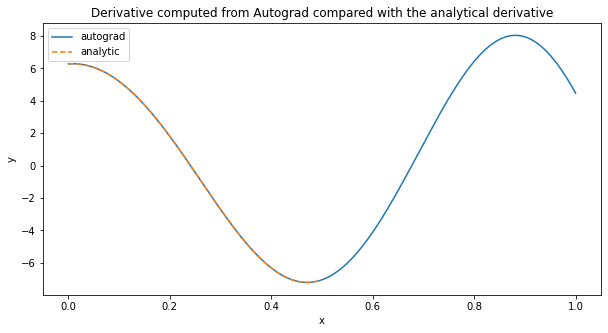

The max absolute difference is: 1.77636e-15


In [18]:
import autograd.numpy as np

# To do elementwise differentiation:
from autograd import elementwise_grad as egrad 

# To plot:
import matplotlib.pyplot as plt 


def f(x):
    return np.sin(2*np.pi*x + x**2)

def f_grad_analytic(x):
    return np.cos(2*np.pi*x + x**2)*(2*np.pi + 2*x)

# Do the comparison:
x = np.linspace(0,1,1000)

f_grad = egrad(f) ##################### setting up object from f

computed = f_grad(x) ################### taking (x)
analytic = f_grad_analytic(x)

fig=plt.figure(figsize=(10,5))
plt.title('Derivative computed from Autograd compared with the analytical derivative')
plt.plot(x,computed,label='autograd')
plt.plot(x[:500],analytic[:500],'--',label='analytic')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

print("The max absolute difference is: %g"%(np.max(np.abs(computed - analytic))))

<!-- !split  -->
## Using autograd

Here we
experiment with what kind of functions Autograd is capable
of finding the gradient of. The following Python functions are just
meant to illustrate what Autograd can do, but please feel free to
experiment with other, possibly more complicated, functions as well.

In [2]:
import autograd.numpy as np
from autograd import grad

def f1(x):
    return x**3 + 1

f1_grad = grad(f1)

# Remember to send in float as argument to the computed gradient from Autograd!
a = 1.0

# See the evaluated gradient at a using autograd:
print("The gradient of f1 evaluated at a = %g using autograd is: %g"%(a,f1_grad(a)))

# Compare with the analytical derivative, that is f1'(x) = 3*x**2 
grad_analytical = 3*a**2
print("The gradient of f1 evaluated at a = %g by finding the analytic expression is: %g"%(a,grad_analytical))

The gradient of f1 evaluated at a = 1 using autograd is: 3
The gradient of f1 evaluated at a = 1 by finding the analytic expression is: 3


## Autograd with more complicated functions

To differentiate with respect to two (or more) arguments of a Python
function, Autograd need to know at which variable the function if
being differentiated with respect to.

In [19]:
import autograd.numpy as np
from autograd import grad
def f2(x1,x2):
    return 3*x1**3 + x2*(x1 - 5) + 1

# By sending the argument 0, Autograd will compute the derivative w.r.t the first variable, in this case x1
f2_grad_x1 = grad(f2,0)

# ... and differentiate w.r.t x2 by sending 1 as an additional arugment to grad
f2_grad_x2 = grad(f2,1)

x1 = 1.0
x2 = 3.0 

print("Evaluating at x1 = %g, x2 = %g"%(x1,x2))
print("-"*30)

# Compare with the analytical derivatives:

# Derivative of f2 w.r.t x1 is: 9*x1**2 + x2:
f2_grad_x1_analytical = 9*x1**2 + x2

# Derivative of f2 w.r.t x2 is: x1 - 5:
f2_grad_x2_analytical = x1 - 5

# See the evaluated derivations:
print("The derivative of f2 w.r.t x1: %g"%( f2_grad_x1(x1,x2) ))
print("The analytical derivative of f2 w.r.t x1: %g"%( f2_grad_x1(x1,x2) ))

print()

print("The derivative of f2 w.r.t x2: %g"%( f2_grad_x2(x1,x2) ))
print("The analytical derivative of f2 w.r.t x2: %g"%( f2_grad_x2(x1,x2) ))

Evaluating at x1 = 1, x2 = 3
------------------------------
The derivative of f2 w.r.t x1: 12
The analytical derivative of f2 w.r.t x1: 12

The derivative of f2 w.r.t x2: -4
The analytical derivative of f2 w.r.t x2: -4


Note that the grad function will not produce the true gradient of the function. The true gradient of a function with two or more variables will produce a vector, where each element is the function differentiated w.r.t a variable.


## More complicated functions using the elements of their arguments directly

In [20]:
import autograd.numpy as np
from autograd import grad
def f3(x): # Assumes x is an array of length 5 or higher
    return 2*x[0] + 3*x[1] + 5*x[2] + 7*x[3] + 11*x[4]**2

f3_grad = grad(f3)

x = np.linspace(0,4,5)

# Print the computed gradient:
print("The computed gradient of f3 is: ", f3_grad(x))

# The analytical gradient is: (2, 3, 5, 7, 22*x[4])
f3_grad_analytical = np.array([2, 3, 5, 7, 22*x[4]])

# Print the analytical gradient:
print("The analytical gradient of f3 is: ", f3_grad_analytical)

The computed gradient of f3 is:  [ 2.  3.  5.  7. 88.]
The analytical gradient of f3 is:  [ 2.  3.  5.  7. 88.]


Note that in this case, when sending an array as input argument, the
output from Autograd is another array. This is the true gradient of
the function, as opposed to the function in the previous example. By
using arrays to represent the variables, the output from Autograd
might be easier to work with, as the output is closer to what one
could expect form a gradient-evaluting function.

<!-- !split  -->
## Functions using mathematical functions from Numpy

In [21]:
import autograd.numpy as np
from autograd import grad
def f4(x):
    return np.sqrt(1+x**2) + np.exp(x) + np.sin(2*np.pi*x)

f4_grad = grad(f4)

x = 2.7

# Print the computed derivative:
print("The computed derivative of f4 at x = %g is: %g"%(x,f4_grad(x)))

# The analytical derivative is: x/sqrt(1 + x**2) + exp(x) + cos(2*pi*x)*2*pi
f4_grad_analytical = x/np.sqrt(1 + x**2) + np.exp(x) + np.cos(2*np.pi*x)*2*np.pi

# Print the analytical gradient:
print("The analytical gradient of f4 at x = %g is: %g"%(x,f4_grad_analytical))

The computed derivative of f4 at x = 2.7 is: 13.8759
The analytical gradient of f4 at x = 2.7 is: 13.8759


## More autograd

In [22]:
import autograd.numpy as np
from autograd import grad
def f5(x):
    if x >= 0:
        return x**2
    else:
        return -3*x + 1

f5_grad = grad(f5)

x = 2.7

# Print the computed derivative:
print("The computed derivative of f5 at x = %g is: %g"%(x,f5_grad(x)))

The computed derivative of f5 at x = 2.7 is: 5.4


## And  with loops

9
 
<
<
<
!
!
C
O
D
E
_
B
L
O
C
K
 
 
p
y
c
o
d

In [23]:
import autograd.numpy as np
from autograd import grad
# Both of the functions are implementation of the sum: sum(x**i) for i = 0, ..., 9
# The analytical derivative is: sum(i*x**(i-1)) 
f6_grad_analytical = 0
for i in range(10):
    f6_grad_analytical += i*x**(i-1)

print("The analytical derivative of f6 at x = %g is: %g"%(x,f6_grad_analytical))

The analytical derivative of f6 at x = 2.7 is: 37732.5


## Using recursion

In [24]:
import autograd.numpy as np
from autograd import grad

def f7(n): # Assume that n is an integer
    if n == 1 or n == 0:
        return 1
    else:
        return n*f7(n-1)

f7_grad = grad(f7)

n = 2.0

print("The computed derivative of f7 at n = %d is: %g"%(n,f7_grad(n)))

# The function f7 is an implementation of the factorial of n.
# By using the product rule, one can find that the derivative is:

f7_grad_analytical = 0
for i in range(int(n)-1):
    tmp = 1
    for k in range(int(n)-1):
        if k != i:
            tmp *= (n - k)
    f7_grad_analytical += tmp

print("The analytical derivative of f7 at n = %d is: %g"%(n,f7_grad_analytical))

The computed derivative of f7 at n = 2 is: 1
The analytical derivative of f7 at n = 2 is: 1


Note that if n is equal to zero or one, Autograd will give an error message. This message appears when the output is independent on input.

## Unsupported functions
Autograd supports many features. However, there are some functions that is not supported (yet) by Autograd.

**Assigning a value to the variable being differentiated with respect to**

In [25]:
import autograd.numpy as np
from autograd import grad

def f8(x): # Assume x is an array
    x[2] = 3
    return x*2

f8_grad = grad(f8)

x = 8.4

print("The derivative of f8 is:",f8_grad(x))

TypeError: 'ArrayBox' object does not support item assignment

Here, Autograd tells us that an 'ArrayBox' does not support item assignment. The item assignment is done when the program tries to assign x[2] to the value 3. However, Autograd has implemented the computation of the derivative such that this assignment is not possible.

## The syntax a.dot(b) when finding the dot product

In [29]:
import autograd.numpy as np
from autograd import grad
def f9(a): # Assume a is an array with 2 elements
    b = np.array([1.0,2.0])
    return np.dot(a,b)

f9_grad = grad(f9)

x = np.array([1.0,0.0])

print("The derivative of f9 is:",f9_grad(x))

The derivative of f9 is: [1. 2.]


Here we are told that the 'dot' function does not belong to Autograd's
version of a Numpy array.  To overcome this, an alternative syntax
which also computed the dot product can be used:

In [30]:
import autograd.numpy as np
from autograd import grad
def f9_alternative(x): # Assume a is an array with 2 elements
    b = np.array([1.0,2.0])
    return np.dot(x,b) # The same as x_1*b_1 + x_2*b_2

f9_alternative_grad = grad(f9_alternative)

x = np.array([3.0,0.0])

print("The gradient of f9 is:",f9_alternative_grad(x))

# The analytical gradient of the dot product of vectors x and b with two elements (x_1,x_2) and (b_1, b_2) respectively
# w.r.t x is (b_1, b_2).

The gradient of f9 is: [1. 2.]


## Recommended to avoid
The documentation recommends to avoid inplace operations such as

In [ ]:
a += b
a -= b
a*= b
a /=b

## Videos on Neural Networks


[Neural Networks demystified](https://www.youtube.com/watch?v=bxe2T-V8XRs&list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU&ab_channel=WelchLabs)

[Building Neural Networks from scratch](https://www.youtube.com/watch?v=Wo5dMEP_BbI&list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3&ab_channel=sentdex)




## Neural networks

Artificial neural networks are computational systems that can learn to
perform tasks by considering examples, generally without being
programmed with any task-specific rules. It is supposed to mimic a
biological system, wherein neurons interact by sending signals in the
form of mathematical functions between layers. All layers can contain
an arbitrary number of neurons, and each connection is represented by
a weight variable.


## Artificial neurons

The field of artificial neural networks has a long history of
development, and is closely connected with the advancement of computer
science and computers in general. A model of artificial neurons was
first developed by McCulloch and Pitts in 1943 to study signal
processing in the brain and has later been refined by others. The
general idea is to mimic neural networks in the human brain, which is
composed of billions of neurons that communicate with each other by
sending electrical signals.  Each neuron accumulates its incoming
signals, which must exceed an activation threshold to yield an
output. If the threshold is not overcome, the neuron remains inactive,
i.e. has zero output.

This behaviour has inspired a simple mathematical model for an artificial neuron.

<!-- Equation labels as ordinary links -->
<div id="artificialNeuron"></div>

$$
\begin{equation}
 y = f\left(\sum_{i=1}^n w_ix_i\right) = f(u)
\label{artificialNeuron} \tag{6}
\end{equation}
$$

Here, the output $y$ of the neuron is the value of its activation function, which have as input
a weighted sum of signals $x_i, \dots ,x_n$ received by $n$ other neurons.

Conceptually, it is helpful to divide neural networks into four
categories:
1. general purpose neural networks for supervised learning,

2. neural networks designed specifically for image processing, the most prominent example of this class being Convolutional Neural Networks (CNNs),

3. neural networks for sequential data such as Recurrent Neural Networks (RNNs), and

4. neural networks for unsupervised learning such as Deep Boltzmann Machines.

In natural science, DNNs and CNNs have already found numerous
applications. In statistical physics, they have been applied to detect
phase transitions in 2D Ising and Potts models, lattice gauge
theories, and different phases of polymers, or solving the
Navier-Stokes equation in weather forecasting.  Deep learning has also
found interesting applications in quantum physics. Various quantum
phase transitions can be detected and studied using DNNs and CNNs,
topological phases, and even non-equilibrium many-body
localization. Representing quantum states as DNNs quantum state
tomography are among some of the impressive achievements to reveal the
potential of DNNs to facilitate the study of quantum systems.

In quantum information theory, it has been shown that one can perform
gate decompositions with the help of neural. 

The applications are not limited to the natural sciences. There is a
plethora of applications in essentially all disciplines, from the
humanities to life science and medicine.

## Neural network types

An artificial neural network (ANN), is a computational model that
consists of layers of connected neurons, or nodes or units.  We will
refer to these interchangeably as units or nodes, and sometimes as
neurons.

It is supposed to mimic a biological nervous system by letting each
neuron interact with other neurons by sending signals in the form of
mathematical functions between layers.  A wide variety of different
ANNs have been developed, but most of them consist of an input layer,
an output layer and eventual layers in-between, called *hidden
layers*. All layers can contain an arbitrary number of nodes, and each
connection between two nodes is associated with a weight variable.

Neural networks (also called neural nets) are neural-inspired
nonlinear models for supervised learning.  As we will see, neural nets
can be viewed as natural, more powerful extensions of supervised
learning methods such as linear and logistic regression and soft-max
methods we discussed earlier.


## Feed-forward neural networks

The feed-forward neural network (FFNN) was the first and simplest type
of ANNs that were devised. In this network, the information moves in
only one direction: forward through the layers.

Nodes are represented by circles, while the arrows display the
connections between the nodes, including the direction of information
flow. Additionally, each arrow corresponds to a weight variable
(figure to come).  We observe that each node in a layer is connected
to *all* nodes in the subsequent layer, making this a so-called
*fully-connected* FFNN.



## Convolutional Neural Network

A different variant of FFNNs are *convolutional neural networks*
(CNNs), which have a connectivity pattern inspired by the animal
visual cortex. Individual neurons in the visual cortex only respond to
stimuli from small sub-regions of the visual field, called a receptive
field. This makes the neurons well-suited to exploit the strong
spatially local correlation present in natural images. The response of
each neuron can be approximated mathematically as a convolution
operation.  (figure to come)

Convolutional neural networks emulate the behaviour of neurons in the
visual cortex by enforcing a *local* connectivity pattern between
nodes of adjacent layers: Each node in a convolutional layer is
connected only to a subset of the nodes in the previous layer, in
contrast to the fully-connected FFNN.  Often, CNNs consist of several
convolutional layers that learn local features of the input, with a
fully-connected layer at the end, which gathers all the local data and
produces the outputs. They have wide applications in image and video
recognition.

## Recurrent neural networks

So far we have only mentioned ANNs where information flows in one
direction: forward. *Recurrent neural networks* on the other hand,
have connections between nodes that form directed *cycles*. This
creates a form of internal memory which are able to capture
information on what has been calculated before; the output is
dependent on the previous computations. Recurrent NNs make use of
sequential information by performing the same task for every element
in a sequence, where each element depends on previous elements. An
example of such information is sentences, making recurrent NNs
especially well-suited for handwriting and speech recognition.

## Other types of networks

There are many other kinds of ANNs that have been developed. One type
that is specifically designed for interpolation in multidimensional
space is the radial basis function (RBF) network. RBFs are typically
made up of three layers: an input layer, a hidden layer with
non-linear radial symmetric activation functions and a linear output
layer (''linear'' here means that each node in the output layer has a
linear activation function). The layers are normally fully-connected
and there are no cycles, thus RBFs can be viewed as a type of
fully-connected FFNN. They are however usually treated as a separate
type of NN due the unusual activation functions.

## Multilayer perceptrons

One uses often so-called fully-connected feed-forward neural networks
with three or more layers (an input layer, one or more hidden layers
and an output layer) consisting of neurons that have non-linear
activation functions.

Such networks are often called *multilayer perceptrons* (MLPs).

## Why multilayer perceptrons?

According to the *Universal approximation theorem*, a feed-forward
neural network with just a single hidden layer containing a finite
number of neurons can approximate a continuous multidimensional
function to arbitrary accuracy, assuming the activation function for
the hidden layer is a **non-constant, bounded and
monotonically-increasing continuous function**.

Note that the requirements on the activation function only applies to
the hidden layer, the output nodes are always assumed to be linear, so
as to not restrict the range of output values.


## Illustration of a single perceptropn model and a multi-perceptron model

<!-- dom:FIGURE: [figures/nns.png, width=600 frac=0.8]  In a) we show a single perceptron model while in b) we dispay a network with two  hidden layers, an input layer and an output layer. -->
<!-- begin figure -->
<img src="figures/nns.png" width=600><p style="font-size: 0.9em"><i>Figure 1: In a) we show a single perceptron model while in b) we dispay a network with two  hidden layers, an input layer and an output layer.</i></p><!-- end figure -->



## Examples of XOR, OR and AND gates



Let us first try to fit various gates using standard linear
regression. The gates we are thinking of are the classical XOR, OR and
AND gates, well-known elements in computer science. The tables here
show how we can set up the inputs $x_1$ and $x_2$ in order to yield a
specific target $y_i$.

In [37]:
"""
Simple code that tests XOR, OR and AND gates with linear regression
"""

import numpy as np
# Design matrix
X = np.array([ [1, 0, 0], [1, 0, 1], [1, 1, 0],[1, 1, 1]],dtype=np.float64) # with intercept
print(f"The X.TX  matrix:{X.T @ X}")
Xinv = np.linalg.pinv(X.T @ X)
print(f"The invers of X.TX  matrix:{Xinv}")

# The XOR gate 
yXOR = np.array( [ 0, 1 ,1, 0])
ThetaXOR  = Xinv @ X.T @ yXOR
print(f"The values of theta for the XOR gate:{ThetaXOR}")
print(f"The linear regression prediction  for the XOR gate:{X @ ThetaXOR}")


# The OR gate 
yOR = np.array( [ 0, 1 ,1, 1])
ThetaOR  = Xinv @ X.T @ yOR
print(f"The values of theta for the OR gate:{ThetaOR}")
print(f"The linear regression prediction  for the OR gate:{X @ ThetaOR}")


# The OR gate 
yAND = np.array( [ 0, 0 ,0, 1])
ThetaAND  = Xinv @ X.T @ yAND
print(f"The values of theta for the AND gate:{ThetaAND}")
print(f"The linear regression prediction  for the AND gate:{X @ ThetaAND}")

The X.TX  matrix:[[4. 2. 2.]
 [2. 2. 1.]
 [2. 1. 2.]]
The invers of X.TX  matrix:[[ 7.50000000e-01 -5.00000000e-01 -5.00000000e-01]
 [-5.00000000e-01  1.00000000e+00 -2.27693602e-16]
 [-5.00000000e-01 -2.08496602e-17  1.00000000e+00]]
The values of theta for the XOR gate:[5.00000000e-01 1.11022302e-16 2.22044605e-16]
The linear regression prediction  for the XOR gate:[0.5 0.5 0.5 0.5]
The values of theta for the OR gate:[0.25 0.5  0.5 ]
The linear regression prediction  for the OR gate:[0.25 0.75 0.75 1.25]
The values of theta for the AND gate:[-0.25  0.5   0.5 ]
The linear regression prediction  for the AND gate:[-0.25  0.25  0.25  0.75]


What is happening here?

## Does Logistic Regression do a better Job?

In [38]:
"""
Simple code that tests XOR and OR gates with linear regression
and logistic regression
"""

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

# Design matrix
X = np.array([ [1, 0, 0], [1, 0, 1], [1, 1, 0],[1, 1, 1]],dtype=np.float64) # with intercept
X = np.array([ [0, 0], [0, 1], [1, 0],[1, 1]],dtype=np.float64) #without intercept
print(f"The X.TX  matrix:{X.T @ X}")
Xinv = np.linalg.pinv(X.T @ X)
print(f"The invers of X.TX  matrix:{Xinv}")

# The XOR gate 
yXOR = np.array( [ 0, 1 ,1, 0])
ThetaXOR  = Xinv @ X.T @ yXOR
print(f"The values of theta for the XOR gate:{ThetaXOR}")
print(f"The linear regression prediction  for the XOR gate:{X @ ThetaXOR}")


# The OR gate 
yOR = np.array( [ 0, 1 ,1, 1])
ThetaOR  = Xinv @ X.T @ yOR
print(f"The values of theta for the OR gate:{ThetaOR}")
print(f"The linear regression prediction  for the OR gate:{X @ ThetaOR}")


# The OR gate 
yAND = np.array( [ 0, 0 ,0, 1])
ThetaAND  = Xinv @ X.T @ yAND
print(f"The values of theta for the AND gate:{ThetaAND}")
print(f"The linear regression prediction  for the AND gate:{X @ ThetaAND}")

# Now we change to logistic regression


# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X, yOR)
print("Test set accuracy with Logistic Regression for OR gate: {:.2f}".format(logreg.score(X,yOR)))

logreg.fit(X, yXOR)
print("Test set accuracy with Logistic Regression for XOR gate: {:.2f}".format(logreg.score(X,yXOR)))


logreg.fit(X, yAND)
print("Test set accuracy with Logistic Regression for AND gate: {:.2f}".format(logreg.score(X,yAND)))

The X.TX  matrix:[[2. 1.]
 [1. 2.]]
The invers of X.TX  matrix:[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
The values of theta for the XOR gate:[0.33333333 0.33333333]
The linear regression prediction  for the XOR gate:[0.         0.33333333 0.33333333 0.66666667]
The values of theta for the OR gate:[0.66666667 0.66666667]
The linear regression prediction  for the OR gate:[0.         0.66666667 0.66666667 1.33333333]
The values of theta for the AND gate:[0.33333333 0.33333333]
The linear regression prediction  for the AND gate:[0.         0.33333333 0.33333333 0.66666667]
Test set accuracy with Logistic Regression for OR gate: 0.75
Test set accuracy with Logistic Regression for XOR gate: 0.50
Test set accuracy with Logistic Regression for AND gate: 0.75


Not exactly impressive, but somewhat better.

## Adding Neural Networks

In [39]:

# and now neural networks with Scikit-Learn and the XOR

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
X, yXOR = make_classification(n_samples=100, random_state=1)
FFNN = MLPClassifier(random_state=1, max_iter=300).fit(X, yXOR)
FFNN.predict_proba( X)
print(f"Test set accuracy with Feed Forward Neural Network  for XOR gate:{FFNN.score(X, yXOR)}")

Test set accuracy with Feed Forward Neural Network  for XOR gate:1.0


## Mathematical model

The output $y$ is produced via the activation function $f$

$$
y = f\left(\sum_{i=1}^n w_ix_i + b_i\right) = f(z),
$$

This function receives $x_i$ as inputs.
Here the activation $z=(\sum_{i=1}^n w_ix_i+b_i)$. 
In an FFNN of such neurons, the *inputs* $x_i$ are the *outputs* of
the neurons in the preceding layer. Furthermore, an MLP is
fully-connected, which means that each neuron receives a weighted sum
of the outputs of *all* neurons in the previous layer.

## Mathematical model

First, for each node $i$ in the first hidden layer, we calculate a weighted sum $z_i^1$ of the input coordinates $x_j$,

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation} z_i^1 = \sum_{j=1}^{M} w_{ij}^1 x_j + b_i^1
\label{_auto6} \tag{7}
\end{equation}
$$

Here $b_i$ is the so-called bias which is normally needed in
case of zero activation weights or inputs. How to fix the biases and
the weights will be discussed below.  The value of $z_i^1$ is the
argument to the activation function $f_i$ of each node $i$, The
variable $M$ stands for all possible inputs to a given node $i$ in the
first layer.  We define  the output $y_i^1$ of all neurons in layer 1 as

<!-- Equation labels as ordinary links -->
<div id="outputLayer1"></div>

$$
\begin{equation}
 y_i^1 = f(z_i^1) = f\left(\sum_{j=1}^M w_{ij}^1 x_j  + b_i^1\right)
\label{outputLayer1} \tag{8}
\end{equation}
$$

where we assume that all nodes in the same layer have identical
activation functions, hence the notation $f$. In general, we could assume in the more general case that different layers have different activation functions.
In this case we would identify these functions with a superscript $l$ for the $l$-th layer,

<!-- Equation labels as ordinary links -->
<div id="generalLayer"></div>

$$
\begin{equation}
 y_i^l = f^l(u_i^l) = f^l\left(\sum_{j=1}^{N_{l-1}} w_{ij}^l y_j^{l-1} + b_i^l\right)
\label{generalLayer} \tag{9}
\end{equation}
$$

where $N_l$ is the number of nodes in layer $l$. When the output of
all the nodes in the first hidden layer are computed, the values of
the subsequent layer can be calculated and so forth until the output
is obtained.



## Mathematical model

The output of neuron $i$ in layer 2 is thus,

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
 y_i^2 = f^2\left(\sum_{j=1}^N w_{ij}^2 y_j^1 + b_i^2\right) 
\label{_auto7} \tag{10}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="outputLayer2"></div>

$$
\begin{equation} 
 = f^2\left[\sum_{j=1}^N w_{ij}^2f^1\left(\sum_{k=1}^M w_{jk}^1 x_k + b_j^1\right) + b_i^2\right]
\label{outputLayer2} \tag{11}
\end{equation}
$$

where we have substituted $y_k^1$ with the inputs $x_k$. Finally, the ANN output reads

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}
 y_i^3 = f^3\left(\sum_{j=1}^N w_{ij}^3 y_j^2 + b_i^3\right) 
\label{_auto8} \tag{12}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation} 
 = f_3\left[\sum_{j} w_{ij}^3 f^2\left(\sum_{k} w_{jk}^2 f^1\left(\sum_{m} w_{km}^1 x_m + b_k^1\right) + b_j^2\right)
  + b_1^3\right]
\label{_auto9} \tag{13}
\end{equation}
$$

## Mathematical model

We can generalize this expression to an MLP with $l$ hidden
layers. The complete functional form is,

<!-- Equation labels as ordinary links -->
<div id="completeNN"></div>

$$
\begin{equation}
y^{l+1}_i = f^{l+1}\left[\!\sum_{j=1}^{N_l} w_{ij}^3 f^l\left(\sum_{k=1}^{N_{l-1}}w_{jk}^{l-1}\left(\dots f^1\left(\sum_{n=1}^{N_0} w_{mn}^1 x_n+ b_m^1\right)\dots\right)+b_k^2\right)+b_1^3\right] 
\label{completeNN} \tag{14}
\end{equation}
$$

which illustrates a basic property of MLPs: The only independent
variables are the input values $x_n$.

## Mathematical model

This confirms that an MLP, despite its quite convoluted mathematical
form, is nothing more than an analytic function, specifically a
mapping of real-valued vectors $\hat{x} \in \mathbb{R}^n \rightarrow
\hat{y} \in \mathbb{R}^m$.

Furthermore, the flexibility and universality of an MLP can be
illustrated by realizing that the expression is essentially a nested
sum of scaled activation functions of the form

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation}
 f(x) = c_1 f(c_2 x + c_3) + c_4
\label{_auto10} \tag{15}
\end{equation}
$$

where the parameters $c_i$ are weights and biases. By adjusting these
parameters, the activation functions can be shifted up and down or
left and right, change slope or be rescaled which is the key to the
flexibility of a neural network.

### Matrix-vector notation

We can introduce a more convenient notation for the activations in an A NN. 

Additionally, we can represent the biases and activations
as layer-wise column vectors $\hat{b}_l$ and $\hat{y}_l$, so that the $i$-th element of each vector 
is the bias $b_i^l$ and activation $y_i^l$ of node $i$ in layer $l$ respectively. 

We have that $\mathrm{W}_l$ is an $N_{l-1} \times N_l$ matrix, while $\hat{b}_l$ and $\hat{y}_l$ are $N_l \times 1$ column vectors. 
With this notation, the sum becomes a matrix-vector multiplication, and we can write
the equation for the activations of hidden layer 2 (assuming three nodes for simplicity) as

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation}
 \hat{y}_2 = f_2(\mathrm{W}_2 \hat{y}_{1} + \hat{b}_{2}) = 
 f_2\left(\left[\begin{array}{ccc}
    w^2_{11} &w^2_{12} &w^2_{13} \\
    w^2_{21} &w^2_{22} &w^2_{23} \\
    w^2_{31} &w^2_{32} &w^2_{33} \\
    \end{array} \right] \cdot
    \left[\begin{array}{c}
           y^1_1 \\
           y^1_2 \\
           y^1_3 \\
          \end{array}\right] + 
    \left[\begin{array}{c}
           b^2_1 \\
           b^2_2 \\
           b^2_3 \\
          \end{array}\right]\right).
\label{_auto11} \tag{16}
\end{equation}
$$

### Matrix-vector notation  and activation

The activation of node $i$ in layer 2 is

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation}
 y^2_i = f_2\Bigr(w^2_{i1}y^1_1 + w^2_{i2}y^1_2 + w^2_{i3}y^1_3 + b^2_i\Bigr) = 
 f_2\left(\sum_{j=1}^3 w^2_{ij} y_j^1 + b^2_i\right).
\label{_auto12} \tag{17}
\end{equation}
$$

This is not just a convenient and compact notation, but also a useful
and intuitive way to think about MLPs: The output is calculated by a
series of matrix-vector multiplications and vector additions that are
used as input to the activation functions. For each operation
$\mathrm{W}_l \hat{y}_{l-1}$ we move forward one layer.


### Activation functions

A property that characterizes a neural network, other than its
connectivity, is the choice of activation function(s).  As described
in, the following restrictions are imposed on an activation function
for a FFNN to fulfill the universal approximation theorem

  * Non-constant

  * Bounded

  * Monotonically-increasing

  * Continuous

### Activation functions, Logistic and Hyperbolic ones

The second requirement excludes all linear functions. Furthermore, in
a MLP with only linear activation functions, each layer simply
performs a linear transformation of its inputs.

Regardless of the number of layers, the output of the NN will be
nothing but a linear function of the inputs. Thus we need to introduce
some kind of non-linearity to the NN to be able to fit non-linear
functions Typical examples are the logistic *Sigmoid*

$$
f(x) = \frac{1}{1 + e^{-x}},
$$

and the *hyperbolic tangent* function

$$
f(x) = \tanh(x)
$$

### Relevance

The *sigmoid* function are more biologically plausible because the
output of inactive neurons are zero. Such activation function are
called *one-sided*. However, it has been shown that the hyperbolic
tangent performs better than the sigmoid for training MLPs.  has
become the most popular for *deep neural networks*

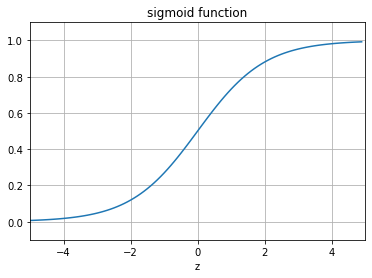

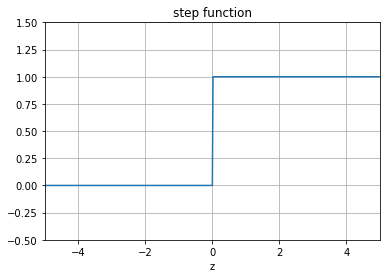

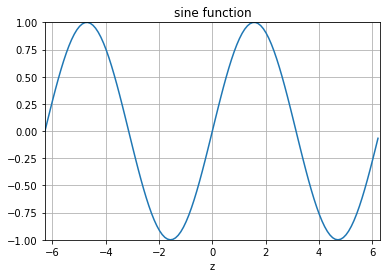

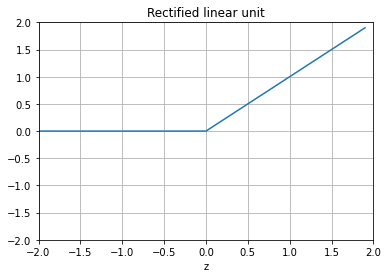

In [35]:
"""The sigmoid function (or the logistic curve) is a 
function that takes any real number, z, and outputs a number (0,1).
It is useful in neural networks for assigning weights on a relative scale.
The value z is the weighted sum of parameters involved in the learning algorithm."""

import numpy
import matplotlib.pyplot as plt
import math as mt

z = numpy.arange(-5, 5, .1)
sigma_fn = numpy.vectorize(lambda z: 1/(1+numpy.exp(-z)))
sigma = sigma_fn(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, sigma)
ax.set_ylim([-0.1, 1.1])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('sigmoid function')

plt.show()

"""Step Function"""
z = numpy.arange(-5, 5, .02)
step_fn = numpy.vectorize(lambda z: 1.0 if z >= 0.0 else 0.0)
step = step_fn(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, step)
ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('step function')

plt.show()

"""Sine Function"""
z = numpy.arange(-2*mt.pi, 2*mt.pi, 0.1)
t = numpy.sin(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, t)
ax.set_ylim([-1.0, 1.0])
ax.set_xlim([-2*mt.pi,2*mt.pi])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('sine function')

plt.show()

"""Plots a graph of the squashing function used by a rectified linear
unit"""
z = numpy.arange(-2, 2, .1)
zero = numpy.zeros(len(z))
y = numpy.max([zero, z], axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, y)
ax.set_ylim([-2.0, 2.0])
ax.set_xlim([-2.0, 2.0])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('Rectified linear unit')

plt.show()

## The multilayer  perceptron (MLP)

The multilayer perceptron is a very popular, and easy to implement approach, to deep learning. It consists of
1. A neural network with one or more layers of nodes between the input and the output nodes.

2. The multilayer network structure, or architecture, or topology, consists of an input layer, one or more hidden layers, and one output layer.

3. The input nodes pass values to the first hidden layer, its nodes pass the information on to the second and so on till we reach the output layer.

As a convention it is normal to call  a  network with one layer of input units, one layer of hidden
units and one layer of output units as  a two-layer network. A network with two layers of hidden units is called a three-layer network etc etc.

For an MLP network there is no direct connection between the output nodes/neurons/units and  the input nodes/neurons/units.
Hereafter we will call the various entities of a layer for nodes.
There are also no connections within a single layer.

The number of input nodes does not need to equal the number of output
nodes. This applies also to the hidden layers. Each layer may have its
own number of nodes and activation functions.

The hidden layers have their name from the fact that they are not
linked to observables and as we will see below when we define the
so-called activation $\hat{z}$, we can think of this as a basis
expansion of the original inputs $\hat{x}$. The difference however
between neural networks and say linear regression is that now these
basis functions (which will correspond to the weights in the network)
are learned from data. This results in  an important difference between
neural networks and deep learning approaches on one side and methods
like logistic regression or linear regression and their modifications on the other side.


## From one to many layers, the universal approximation theorem


A neural network with only one layer, what we called the simple
perceptron, is best suited if we have a standard binary model with
clear (linear) boundaries between the outcomes. As such it could
equally well be replaced by standard linear regression or logistic
regression. Networks with one or more hidden layers approximate
systems with more complex boundaries.

As stated earlier, 
an important theorem in studies of neural networks, restated without
proof here, is the [universal approximation
theorem](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.441.7873&rep=rep1&type=pdf).

It states that a feed-forward network with a single hidden layer
containing a finite number of neurons can approximate continuous
functions on compact subsets of real functions. The theorem thus
states that simple neural networks can represent a wide variety of
interesting functions when given appropriate parameters. It is the
multilayer feedforward architecture itself which gives neural networks
the potential of being universal approximators.


## Deriving the back propagation code for a multilayer perceptron model



As we have seen now in a feed forward network, we can express the final output of our network in terms of basic matrix-vector multiplications.
The unknowwn quantities are our weights $w_{ij}$ and we need to find an algorithm for changing them so that our errors are as small as possible.
This leads us to the famous [back propagation algorithm](https://www.nature.com/articles/323533a0).

The questions we want to ask are how do changes in the biases and the
weights in our network change the cost function and how can we use the
final output to modify the weights?

To derive these equations let us start with a plain regression problem
and define our cost function as

$$
{\cal C}(\hat{W})  =  \frac{1}{2}\sum_{i=1}^n\left(y_i - t_i\right)^2,
$$

where the $t_i$s are our $n$ targets (the values we want to
reproduce), while the outputs of the network after having propagated
all inputs $\hat{x}$ are given by $y_i$.  Below we will demonstrate
how the basic equations arising from the back propagation algorithm
can be modified in order to study classification problems with $K$
classes.

## Definitions

With our definition of the targets $\hat{t}$, the outputs of the
network $\hat{y}$ and the inputs $\hat{x}$ we
define now the activation $z_j^l$ of node/neuron/unit $j$ of the
$l$-th layer as a function of the bias, the weights which add up from
the previous layer $l-1$ and the forward passes/outputs
$\hat{a}^{l-1}$ from the previous layer as

$$
z_j^l = \sum_{i=1}^{M_{l-1}}w_{ij}^la_i^{l-1}+b_j^l,
$$

where $b_k^l$ are the biases from layer $l$.  Here $M_{l-1}$
represents the total number of nodes/neurons/units of layer $l-1$. The
figure here illustrates this equation.  We can rewrite this in a more
compact form as the matrix-vector products we discussed earlier,

$$
\hat{z}^l = \left(\hat{W}^l\right)^T\hat{a}^{l-1}+\hat{b}^l.
$$

With the activation values $\hat{z}^l$ we can in turn define the
output of layer $l$ as $\hat{a}^l = f(\hat{z}^l)$ where $f$ is our
activation function. In the examples here we will use the sigmoid
function discussed in our logistic regression lectures. We will also use the same activation function $f$ for all layers
and their nodes.  It means we have

$$
a_j^l = f(z_j^l) = \frac{1}{1+\exp{-(z_j^l)}}.
$$

## Derivatives and the chain rule

From the definition of the activation $z_j^l$ we have

$$
\frac{\partial z_j^l}{\partial w_{ij}^l} = a_i^{l-1},
$$

and

$$
\frac{\partial z_j^l}{\partial a_i^{l-1}} = w_{ji}^l.
$$

With our definition of the activation function we have that (note that this function depends only on $z_j^l$)

$$
\frac{\partial a_j^l}{\partial z_j^{l}} = a_j^l(1-a_j^l)=f(z_j^l)(1-f(z_j^l)).
$$

## Derivative of the cost function

With these definitions we can now compute the derivative of the cost function in terms of the weights.

Let us specialize to the output layer $l=L$. Our cost function is

$$
{\cal C}(\hat{W^L})  =  \frac{1}{2}\sum_{i=1}^n\left(y_i - t_i\right)^2=\frac{1}{2}\sum_{i=1}^n\left(a_i^L - t_i\right)^2,
$$

The derivative of this function with respect to the weights is

$$
\frac{\partial{\cal C}(\hat{W^L})}{\partial w_{jk}^L}  =  \left(a_j^L - t_j\right)\frac{\partial a_j^L}{\partial w_{jk}^{L}},
$$

The last partial derivative can easily be computed and reads (by applying the chain rule)

$$
\frac{\partial a_j^L}{\partial w_{jk}^{L}} = \frac{\partial a_j^L}{\partial z_{j}^{L}}\frac{\partial z_j^L}{\partial w_{jk}^{L}}=a_j^L(1-a_j^L)a_k^{L-1},
$$

## Bringing it together, first back propagation equation

We have thus

$$
\frac{\partial{\cal C}(\hat{W^L})}{\partial w_{jk}^L}  =  \left(a_j^L - t_j\right)a_j^L(1-a_j^L)a_k^{L-1},
$$

Defining

$$
\delta_j^L = a_j^L(1-a_j^L)\left(a_j^L - t_j\right) = f'(z_j^L)\frac{\partial {\cal C}}{\partial (a_j^L)},
$$

and using the Hadamard product of two vectors we can write this as

$$
\hat{\delta}^L = f'(\hat{z}^L)\circ\frac{\partial {\cal C}}{\partial (\hat{a}^L)}.
$$

This is an important expression. The second term on the right handside
measures how fast the cost function is changing as a function of the $j$th
output activation.  If, for example, the cost function doesn't depend
much on a particular output node $j$, then $\delta_j^L$ will be small,
which is what we would expect. The first term on the right, measures
how fast the activation function $f$ is changing at a given activation
value $z_j^L$.

Notice that everything in the above equations is easily computed.  In
particular, we compute $z_j^L$ while computing the behaviour of the
network, and it is only a small additional overhead to compute
$f'(z^L_j)$.  The exact form of the derivative with respect to the
output depends on the form of the cost function.
However, provided the cost function is known there should be little
trouble in calculating

$$
\frac{\partial {\cal C}}{\partial (a_j^L)}
$$

With the definition of $\delta_j^L$ we have a more compact definition of the derivative of the cost function in terms of the weights, namely

$$
\frac{\partial{\cal C}(\hat{W^L})}{\partial w_{jk}^L}  =  \delta_j^La_k^{L-1}.
$$

## Derivatives in terms of $z_j^L$

It is also easy to see that our previous equation can be written as

$$
\delta_j^L =\frac{\partial {\cal C}}{\partial z_j^L}= \frac{\partial {\cal C}}{\partial a_j^L}\frac{\partial a_j^L}{\partial z_j^L},
$$

which can also be interpreted as the partial derivative of the cost function with respect to the biases $b_j^L$, namely

$$
\delta_j^L = \frac{\partial {\cal C}}{\partial b_j^L}\frac{\partial b_j^L}{\partial z_j^L}=\frac{\partial {\cal C}}{\partial b_j^L},
$$

That is, the error $\delta_j^L$ is exactly equal to the rate of change of the cost function as a function of the bias. 
## Bringing it together

We have now three equations that are essential for the computations of the derivatives of the cost function at the output layer. These equations are needed to start the algorithm and they are

**The starting equations.**

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation}
\frac{\partial{\cal C}(\hat{W^L})}{\partial w_{jk}^L}  =  \delta_j^La_k^{L-1},
\label{_auto13} \tag{18}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation}
\delta_j^L = f'(z_j^L)\frac{\partial {\cal C}}{\partial (a_j^L)},
\label{_auto14} \tag{19}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto15"></div>

$$
\begin{equation}
\delta_j^L = \frac{\partial {\cal C}}{\partial b_j^L},
\label{_auto15} \tag{20}
\end{equation}
$$

An interesting consequence of the above equations is that when the
activation $a_k^{L-1}$ is small, the gradient term, that is the
derivative of the cost function with respect to the weights, will also
tend to be small. We say then that the weight learns slowly, meaning
that it changes slowly when we minimize the weights via say gradient
descent. In this case we say the system learns slowly.

Another interesting feature is that is when the activation function,
represented by the sigmoid function here, is rather flat when we move towards
its end values $0$ and $1$ (see the above Python codes). In these
cases, the derivatives of the activation function will also be close
to zero, meaning again that the gradients will be small and the
network learns slowly again.



We need a fourth equation and we are set. We are going to propagate
backwards in order to the determine the weights and biases. In order
to do so we need to represent the error in the layer before the final
one $L-1$ in terms of the errors in the final output layer.

## Final back propagating equation

We have that (replacing $L$ with a general layer $l$)

$$
\delta_j^l =\frac{\partial {\cal C}}{\partial z_j^l}.
$$

We want to express this in terms of the equations for layer $l+1$. Using the chain rule and summing over all $k$ entries we have

$$
\delta_j^l =\sum_k \frac{\partial {\cal C}}{\partial z_k^{l+1}}\frac{\partial z_k^{l+1}}{\partial z_j^{l}}=\sum_k \delta_k^{l+1}\frac{\partial z_k^{l+1}}{\partial z_j^{l}},
$$

and recalling that

$$
z_j^{l+1} = \sum_{i=1}^{M_{l}}w_{ij}^{l+1}a_i^{l}+b_j^{l+1},
$$

with $M_l$ being the number of nodes in layer $l$, we obtain

$$
\delta_j^l =\sum_k \delta_k^{l+1}w_{kj}^{l+1}f'(z_j^l),
$$

This is our final equation.

We are now ready to set up the algorithm for back propagation and learning the weights and biases.

## Setting up the Back propagation algorithm



The four equations  provide us with a way of computing the gradient of the cost function. Let us write this out in the form of an algorithm.

First, we set up the input data $\hat{x}$ and the activations
$\hat{z}_1$ of the input layer and compute the activation function and
the pertinent outputs $\hat{a}^1$.



Secondly, we perform then the feed forward till we reach the output
layer and compute all $\hat{z}_l$ of the input layer and compute the
activation function and the pertinent outputs $\hat{a}^l$ for
$l=2,3,\dots,L$.



Thereafter we compute the ouput error $\hat{\delta}^L$ by computing all

$$
\delta_j^L = f'(z_j^L)\frac{\partial {\cal C}}{\partial (a_j^L)}.
$$

Then we compute the back propagate error for each $l=L-1,L-2,\dots,2$ as

$$
\delta_j^l = \sum_k \delta_k^{l+1}w_{kj}^{l+1}f'(z_j^l).
$$

Finally, we update the weights and the biases using gradient descent for each $l=L-1,L-2,\dots,2$ and update the weights and biases according to the rules

$$
w_{jk}^l\leftarrow  = w_{jk}^l- \eta \delta_j^la_k^{l-1},
$$

$$
b_j^l \leftarrow b_j^l-\eta \frac{\partial {\cal C}}{\partial b_j^l}=b_j^l-\eta \delta_j^l,
$$

The parameter $\eta$ is the learning parameter discussed in connection with the gradient descent methods.
Here it is convenient to use stochastic gradient descent (see the examples below) with mini-batches with an outer loop that steps through multiple epochs of training.